In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from itertools import combinations
from scipy.stats import pearsonr

In [2]:
# out dir
out_dir = '../output/ExtFig2m,n'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# read raw CRC data
df = pd.read_parquet('../input/Dataset2(CRC)/CRC-097_raw_cylinter_clustering.parquet')

channels1 = [
    'anti_CD3', 'Keratin_570', 'aSMA_660', 'PD1_647', 'CD20_488', 'CD68_555',
    'CD8a_660', 'CD163_488', 'FOXP3_570', 'PDL1_647', 'Ecad_488',
    'Vimentin_555', 'CDX2_647', 'LaminABC_488', 'Desmin_555', 'CD31_647',
    'PCNA_488', 'CollagenIV_647', 'CD4_488', 'CD45_PE', 'anti_CD45RO',
    ]
channels2 = ['FOXP3_570', 'CD4_488', 'anti_CD45RO', 'CD45_PE']

In [3]:
# CellIDs selected by curateThumbnails modules in CyLinter for SARDANA-097 raw (cluster 7)

# random state 1
examples = [
    318154, 1131197, 181697, 836061, 1157745, 1156537, 549436, 915845, 554823, 1185905, 747158, 773518, 
    375501, 1055582, 1187469, 967642, 150091, 541742, 976374, 703050, 184148, 834283, 1104458, 245310, 
    668232, 1097743, 347315, 800167, 1191955, 240563, 964743, 1087784, 1045009, 978769, 198261, 430440, 
    834743, 446445, 403965, 477293, 467154, 817282, 1194881, 746136, 1035066, 481219, 391358, 1096486, 
    228681, 484302, 1061924, 1062460, 565611, 618155, 1149486, 1050137, 331281, 594917, 578251, 512421, 
    1170438, 954333, 911626, 1032814, 1023184, 1157492, 691491, 552349, 387853, 794751, 1185629, 1116561, 
    1016390, 724849, 1029949, 1081453, 727353, 364141, 21685, 889848, 854791, 237074, 991351, 887522, 
    1142804, 388323, 419456, 289291, 969997, 389563, 896343, 197295, 742454, 186295, 368674, 631892, 545060, 
    174723, 369435, 448888, 882509, 961918, 807377, 246604, 151274, 1173525, 380600, 722378, 762796, 292646, 
    357577, 703543, 294443, 855857, 314814, 777282, 987993, 290556, 1022868, 812115, 374602, 829840, 150035, 
    786917, 946262, 981004, 1050636, 798509, 684134, 955006, 483456, 972570, 830725, 1088769, 794965, 206627, 
    273517, 243225, 215912, 317908, 605585, 304952, 490996, 1009782, 926421, 1115495, 718372, 496526, 454552, 
    825977, 154227, 876460, 831960, 734697, 956608, 889849, 867649, 371075, 437907, 556394, 811478, 89278, 
    515206, 1170640, 916604, 682211, 406102, 913433, 1171559, 362304, 1119727, 926805, 1125873, 1060686, 
    392689, 726057, 810214, 1048332, 262199, 578378, 725632, 967595, 1055610, 308534, 917458, 901179, 795417, 
    969077, 216581, 1175188, 323460, 1109228, 94903, 772189, 301241, 1173945, 435358, 1163551, 362164, 
    495549, 444482, 290708, 152250, 738071, 236369, 1103587, 1223873, 961506, 1118274, 1156088, 1004136, 
    547727, 617103, 196259, 288819, 558848, 112934, 787329, 582455, 872577, 980715, 393040, 1188580, 360116, 
    399000, 860254, 585278, 289478, 684264, 1215283, 914406, 1164647, 981766, 327699, 1044336, 910375, 
    1154085, 826402, 974367, 577876, 333376, 632329, 1096094, 907751, 1183817, 676175, 1112511, 917191, 
    910585, 289065, 495170, 372207, 1130635, 1074757, 221801, 958985, 257405, 1172429, 1104455, 1169024, 
    817960, 242662, 1207060, 897581, 340304, 1141604, 460807, 748409, 339764, 397511, 373987, 370830, 
    1190754, 914176, 182887, 243483, 1155821, 472222, 1036205, 633118, 326530, 373898, 855045, 432599, 
    1109559, 516907, 997125, 196793, 1125618, 1096715, 662322, 436859, 979376, 266872, 291551, 247131, 
    939278, 920654, 666282, 1233873, 569766, 1232387, 240862, 519218, 1015821, 747029, 387960, 710370, 
    1040919, 298680, 327814, 597794, 1166942, 307519, 378972, 605727, 555266, 1137078, 1174478, 426725, 
    297418, 647523, 352137, 766090, 476259, 460369, 1230527, 1060053, 734034, 1144427, 344882, 579839, 
    372733, 369592, 885214, 464780, 401090, 625, 309082, 458376, 286506, 357187, 648337, 396386, 881033, 
    1022305, 1018076, 558476, 413108, 462315, 375702, 389703, 1026522, 1116450, 281184, 1098881, 336925, 
    658802, 1093141, 1017830, 1002350, 1179850, 862903, 419131, 1053623, 1177322, 1155516, 1174421, 
    1186966, 279674, 433973, 745771, 1006341, 402799, 94557, 578101, 1094941, 297574, 795143, 1216299, 
    848302, 198576, 998539, 288380, 708655, 442125, 827494, 864312, 694447, 983434, 200900, 812250, 301681, 
    1070142, 1175218, 582197, 286881, 156646, 945398, 687162, 342634, 880880, 1141261, 224319, 949627, 
    800060, 855324, 1222138, 573252, 759825, 364478, 1157776, 901420, 1191208, 816953, 305329, 194596, 
    826618, 1042613, 368986, 320696, 320091, 427503, 252542, 807816, 724865, 289284, 376836, 1220844, 
    952983, 1170486, 1007644, 938159, 965444, 1002512, 312227, 1235980, 688855, 30865, 742945, 504918, 
    941744, 666835, 981703, 238099, 485730, 236781, 405548, 242652, 284627, 313576, 412230, 665708, 
    608879, 1048977, 216510, 1086709, 240818, 691941, 1061180, 917459, 819878, 829770, 1089484, 318289, 
    969360, 559847, 379315, 209219, 814814, 1143868, 167071, 766497, 21713, 1179730, 696486, 553227, 
    948495, 1035903, 313590, 206873, 1048608, 658786, 1109740, 855065, 1050111, 607415, 1104041, 1120408, 
    937426, 523606, 378033, 964199, 274795, 1078487, 559556, 1091311, 375028, 768878, 1174894, 363446, 
    616046, 1012003, 222178, 411955, 295999, 661907, 319723, 371057, 932912, 302765, 1007867, 657299, 
    1044819, 465269, 1055818, 991390, 942950, 261089, 636828, 1150391, 158215, 1126112, 920870, 665906, 
    334515, 998929, 768767, 606441, 1011974, 813895, 461693, 290045, 1066199, 359971, 960318, 1157618, 
    214392, 1202346, 1119834, 357599, 1190723, 24947, 456775, 461067, 482313, 1087181, 1184364, 293871, 
    988759, 1092571, 290521, 281177, 405192, 886951, 891102, 1100355, 1165633, 243284, 772025, 1167388, 
    383559, 1110622, 1196936, 1086739, 1069761, 372812, 999305, 791956, 1203663, 854624, 1012704, 
    675080, 594748, 142845, 370267, 918962, 270911, 1191791, 1051397, 1026127, 1165613, 334454, 606065, 
    833354, 206774, 860986, 897813, 643237, 116076, 474680, 877012, 1118476, 822935, 420800, 796439, 
    919664, 289290, 164212, 992720, 982143, 874764, 563483, 805906, 540799, 792223, 147387, 291194, 
    1060636, 1122345, 1168229, 1070813, 860522, 243535, 600793, 460094, 855647, 405641, 948986, 1169604, 
    480944, 471277, 1146804, 1175569, 1208825, 405863, 470835, 1174423, 800159, 446277, 1083866, 792601, 
    928578, 177647, 735658, 951695, 463668, 521561, 882729, 375351, 1077686, 514269, 350242, 861530, 
    316917, 423312, 350055, 1022511, 373899, 1217192, 182057, 210355, 381834, 1061742, 1184675, 367487, 
    377061, 1062913, 1023925, 215455, 989278, 1059847, 558730, 415049, 1209566, 899636, 752395, 1084744, 
    916914, 420579, 1234927, 531354, 1164149, 735653, 1203462, 551236, 839192, 332216, 980516, 1202527, 
    991218, 967652, 1086297, 1105993, 316156, 977627, 746774, 1192703, 1093718, 926432, 1161518, 897361, 
    389016, 370445, 473784, 1055487, 909308, 1207741, 1002478, 541420, 448590, 473921, 1048607, 164492, 
    373361, 457329, 1021090, 799709, 741745, 422748, 140058, 591355, 832110, 442648, 1137651, 1144719, 
    1176160, 1138535, 90011, 1156149, 181915, 885758, 341926, 1088848, 964850, 1120090, 120828, 1072687, 
    259253, 1020877, 816697, 826316, 681268, 674137, 389223, 576302, 1116770, 1160941, 197817, 607238, 
    777087, 294403, 1184751, 1119166, 987311, 935574, 581065, 1029400, 1156884, 238851, 926894, 915742, 
    591317, 1052257, 78906, 964950, 1133751, 950499, 1161463, 1135191, 1023704, 374161, 1141966, 465196, 
    1137860, 739642, 1113169, 327842, 1149882, 1186922, 719826, 566490, 1221014, 699080, 566717, 50178, 
    1035069, 1044761, 1091394, 827955, 1090175, 493846, 380768, 915705, 867418, 262750, 1195821, 736974, 
    1104643, 748434, 399864, 242942, 872576, 825039, 374791, 218134, 637284, 938907, 848704, 1128988, 
    1052584, 1160874, 501283, 1218223, 1011816, 441447, 712820, 1195505, 827647, 800464, 1056010, 1149091, 
    1111998, 1076136, 274718, 1091590, 698888, 1188872, 992635, 160378, 1060637, 236314, 838543, 1192441, 
    221019, 337355, 179348, 1145032, 904778, 499361, 418973, 1007158, 913734, 328195, 643698, 1216257, 
    375510, 1210138, 374067, 410830, 1137619, 1137080, 859941, 1182839, 207272, 1171539, 165443, 901087, 
    213854, 993568, 208742, 1179067, 970537, 287114, 177506, 683022, 784703, 810687, 1060364, 1119491, 
    1122299, 512944, 1099578, 552760, 742208, 1024802, 1125117, 431462, 342172, 1175833, 224431, 783006, 
    733750, 734111, 668458, 1091093, 771576, 160009, 1034087, 1084123, 1150753, 945215, 1005738, 215719, 
    338233, 1134487, 984460, 703000, 199285, 881261, 906763, 573796, 751160, 1157587, 1175371, 482390, 
    1171492, 1057791, 1212493, 423641, 759603, 214235, 341724, 107319, 636548, 957932, 371560, 1078544, 
    1003820, 312620, 374681, 291815, 382874, 745898, 113017, 371136, 767085, 941186, 344531, 1221516, 
    399452, 906163, 274453, 1160940, 976700, 905363, 274668, 674416, 713585, 1087061, 844156, 1153081, 
    780039, 1005388, 416491, 999008, 1211150, 710066, 203849, 620608, 812403, 731268, 594261, 836080, 
    920545, 1162395, 387696, 998356, 620293, 607544, 564121, 1192600, 387777, 1126182, 204119, 1016543, 
    361209, 377798, 1161085, 1095519, 340403, 1224875, 1121202, 800176, 180735, 814764, 221483, 1099364, 
    658132, 333105, 823199, 987200, 657886, 298964, 885375, 993937, 1165919, 245068, 794786, 1003395, 
    970030, 1180126, 1233451, 1084533, 394327, 422106, 423322, 963063, 1008334, 1063285, 198415, 751066, 
    437425, 418218, 588195, 1104147, 203187, 1037646, 1145109, 447776, 273799, 252735, 1057678, 470678, 
    320380, 289379, 1020508, 839419, 1125002, 198544, 385770, 577666, 299904, 1048575, 428911, 114753, 
    619345, 1088406, 319005, 437157, 758393, 240497, 514120, 339890, 542728, 382507, 354942, 1198911, 
    1083117, 1212638, 545207, 915868, 816982, 723502, 186618, 1059383, 365085, 979357, 1122894, 1220890, 
    169645, 922310, 390777, 471816, 454018, 718209, 926549, 1162668, 1056408, 963062, 240550, 561110, 
    786138, 927424, 596066, 758119, 746746, 870667, 258663, 1196120, 313579, 1127125, 1039308, 238809, 
    819009, 958258, 523752, 950451, 1076465, 905382, 640077, 931320, 1170047, 1109385, 1197895, 106228, 
    708604, 370855, 785950, 910746, 608755, 660846, 223671, 396095, 133374, 164329, 582918, 1025984, 
    393529, 1147403, 1077655, 599909, 500592, 1193457, 551257, 710489, 172185, 870973, 1111648, 596352, 
    1202570, 440334, 587824, 1009163, 1113784, 804738, 514131, 1168678, 1140479, 771168, 246856, 1119695, 
    368897, 422034, 876666, 314118, 420982, 626033, 1063238, 400468, 110481, 1019727, 312569, 453768, 
    1141855, 803812, 1039822, 316738, 706001, 713681, 294764, 250070, 1125688, 550812, 874173, 565622, 
    301340, 1030808, 928644, 1175129, 331725, 965537, 313462, 144544, 388760, 188767, 1120910, 980837, 
    290715, 1209350, 986950, 1056186, 723086, 1151263, 615791, 915477, 914620, 963404, 306929, 1153104, 
    431124, 1067296, 1214385, 416877, 1028343, 857338, 180769, 841255, 483526, 820553, 1011003, 754190, 
    515431, 281409, 897276, 722249, 850816, 443157, 771682, 586039, 1115549, 654387, 926097, 568254, 
    464283, 370369, 766988, 623639, 515174, 734175, 1022672, 553544, 640774, 227261, 1170949, 926010, 
    1083410, 1222303, 1123884, 126647, 84516, 938359, 1120383, 370859, 823831, 299191, 974401, 693028, 
    764313, 183214, 881777, 382216, 936548, 366024, 1221331, 239766, 1023845, 1165765, 341422, 1173824, 
    447685, 936344, 325769, 1063077, 1122482, 269781, 459023, 714755, 1160427, 1072627, 499886, 380996, 
    501880, 334768, 634571, 323212, 1099799, 732045, 386851, 809309, 1145140, 961296, 1058330, 1114286, 
    325862, 1076713, 936415, 281233, 469995, 475009, 1139932, 963251, 1103657, 1210142, 1204485, 709098, 
    294402, 959366, 378757, 1032591, 1120169, 1125852, 1160048, 404661, 1175516, 485022, 363499, 1163182, 
    885170, 840342, 516824, 317221, 1086802, 511993, 490698, 1066355, 921578, 9612, 858534, 764569, 239535, 
    303846, 290357, 1090143, 673967, 1005502, 446921, 513833, 416442, 1021616, 826457, 456150, 473168, 
    567044, 916182, 418058, 461692, 455049, 1121102, 187122, 765795, 273148, 640430, 1022782, 1027351, 
    243563, 420971, 558019, 248738, 902824, 589238, 881776, 1216775, 1062889, 718303, 1183346, 1203008, 
    249614, 131783, 981456, 520363, 1169406, 440911, 377877, 1002747, 1165822, 767884, 425855, 351805, 
    809739, 770741, 1043272, 597804, 267087, 1213626, 1219533, 789992, 538591, 1185034, 963660, 885258, 
    1104562, 1144035, 597237, 1116019, 920086, 146353, 927053, 1095851, 833981, 1108978, 170976, 632358, 
    371456, 204646, 881374, 262583, 953176, 1189950, 1094529, 958764, 466835, 785666, 281935, 1120602, 
    1174780, 558282, 980755, 982316, 608206, 243205, 615116, 761142, 855003, 386805, 143326, 206372, 
    1031061, 286332, 423974, 1010524, 1217282, 1212703, 844155, 1087064, 989759, 390976, 650592, 1209857, 
    400701, 387955, 326015, 1033071, 1208666, 1151323, 563573, 1058023, 639616, 581631, 1098591, 140712, 
    1197215, 985932, 1036377, 530538, 1172449, 662831, 803462, 963034, 171375, 1034158, 838313, 296570, 
    597037, 265327, 390268, 400693, 559965, 364920, 973484, 368369, 146800, 935823, 1061221, 760283, 
    1215695, 409552, 552495, 714364, 967476, 558720, 947449, 854942, 302887, 691800, 1232907, 1063913, 
    703870, 305633, 632869, 794196, 228305, 733407, 771668, 332598, 850521, 122361, 246177, 829413, 
    998743, 1175279, 715370, 1033529, 969462, 460723, 1127716, 431285, 1165775, 463349, 395019, 289125, 
    976086, 1207101, 596885, 482552, 196530, 964369, 1142295, 335359, 196644, 573470, 608047, 853592, 
    566244, 292302, 871448, 1031844, 282924, 963500, 860958, 596859, 1124182, 270499, 972465, 1181024, 
    1069508, 199129, 1216901, 1090344, 552864, 1167008, 1197702, 368833, 594676, 427229, 426729, 321115, 
    246649, 1043735, 289176, 1094471, 64341, 558165, 692125, 1155134, 286671, 374163, 1163593, 974745, 
    688966, 880730, 954754, 273520, 366128, 200629, 320228, 453254, 620605, 961528, 400258, 332066, 
    996992, 465516, 366442, 237424, 872488, 594846, 551490, 640961, 579943, 245529, 164543, 1160884, 
    1169966, 151771, 1192712, 990354, 319678, 243720, 372102, 486842, 1164442, 316206, 459037, 174310, 
    1035521, 198454, 1218529, 196261, 366811, 723695, 828741, 858382, 204258, 394124, 337656, 993056, 
    1034878, 225720, 540824, 954512, 362872, 340360, 656015, 334446, 704274, 321735, 399610, 1099520, 
    245918, 1039537, 710659, 355098, 747580, 529838, 367199, 1126918, 1197633, 1021182, 1080645, 
    1208931, 314626, 993253, 298194, 555404, 374805, 291330, 1222158, 578779, 904388, 360094, 1014657, 
    167650, 987124, 429520, 1063046, 926738, 422573, 876667, 458498, 301537, 401292, 237875, 252552, 
    764570, 458278, 235222, 846511, 167909, 740308, 1083093, 298967, 1210329, 989892, 957216, 746742, 
    1197241, 754685, 1022112, 922986, 1035553, 907738, 312767, 987666, 817304, 1174843, 1187197, 
    1083316, 981033, 280878, 360038, 444698, 888502, 839641, 889720, 1125999, 380694, 1147091, 
    918819, 1178717, 383242, 597909, 502591, 411816, 1018183, 243827, 539715, 1048421, 287840, 
    557482, 1011805, 689528, 243379, 289188, 293920, 243431, 917941, 247880, 860768, 1180003, 1226474, 
    1154848, 558932, 823564, 421788, 1137878, 341173, 817697, 1060924, 1079023, 416286, 1052615, 
    631658, 430611, 1142471, 419465, 961240, 1215438, 276106, 237811, 1003246, 565692, 386001, 539168, 
    1151518, 533215, 836564, 537075, 372355, 996368, 1172274, 1177644, 368074, 1024295, 390369, 288217, 
    291748, 417529, 1183082, 289084, 917426, 1034499, 1105659, 738318, 605412, 388404, 559821, 966601, 
    453627, 686525, 705362, 1215921, 306103, 457836, 396562, 366927, 364063, 909489, 754056, 287665, 
    976473, 568977, 241033, 810484, 1110770, 352199, 457856, 1206926, 239507, 793274, 341870, 1202939, 
    617829, 328942, 502894, 1183607, 281671, 919338, 335903, 915981, 1012410, 1222233, 1236845, 1149648, 
    920764, 186592, 236929, 397025, 798229, 513327, 365771, 747633, 1066513, 375714, 153098, 399160, 
    329007, 785789, 584567, 240918, 814388, 146850, 594747, 1120934, 423572, 581066, 733223, 481887, 
    1167059, 529896, 1124237, 1189456, 748980, 733411, 517864, 1181149, 522967, 361630, 1011079, 236736, 
    1087123, 772036, 781532, 1089685, 280319, 225824, 420407, 985455, 243721, 1078895, 386152, 202130, 
    1187799, 1137077, 1110611, 963431, 985720, 1188731, 928065, 1004765, 928203, 674506, 981235, 151854, 
    1101325, 1227358, 807717, 288749, 471906, 366533, 402539, 1033447, 247304, 689345, 847890, 1103238, 
    1084645, 1113527, 117969, 1072968, 1222396, 343260, 257309, 244636, 195354, 1092341, 268028, 318239, 
    247220, 616618, 1175155, 410094, 1167315, 492740, 290970, 794766, 380200, 146645, 1002349, 422831, 
    999973, 216301, 592810, 1049828, 550658, 88376, 1009775, 169061, 337660, 1068635, 1065009, 372654, 
    763968, 1155081, 758655, 857999, 1094633, 188536, 1083094, 920020, 862021, 932442, 1006002, 864040, 
    380983, 206166, 704262, 99178, 243987, 1071523, 459293, 980944, 785531, 607105, 1041764, 199885, 
    1122897, 754607, 161549, 235865, 646232, 276468, 205887, 779865, 1063481, 139662, 777825, 358405, 
    911815, 844943, 258586, 611997, 1131178, 523423, 470247, 1108065, 928113, 779699, 437718, 448603
]
example_dict = dict(zip(examples, [examples.index(i) for i in examples]))

In [4]:
cluster = df[df['cluster_2d'] == 7]
cluster.set_index('CellID', inplace=True)

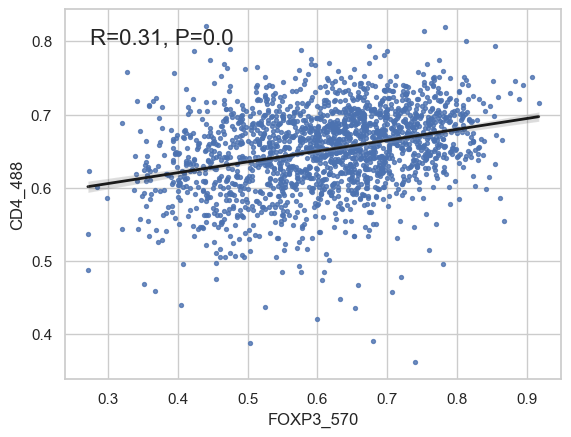

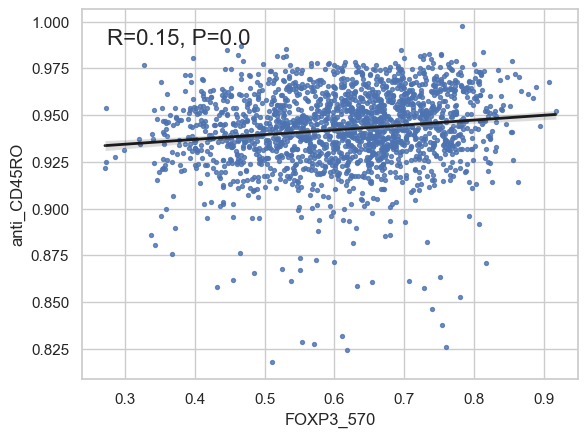

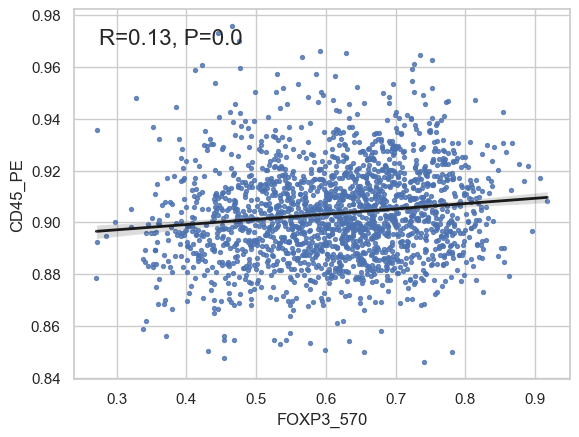

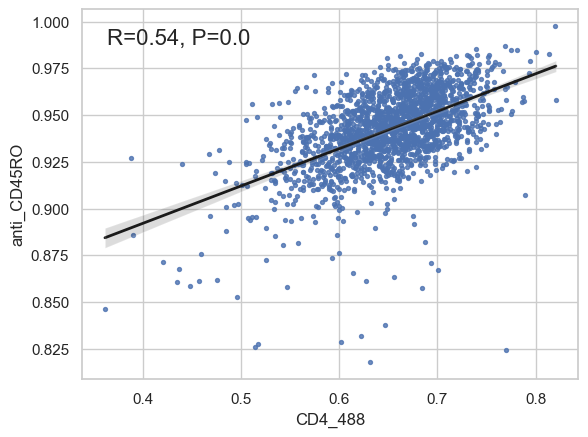

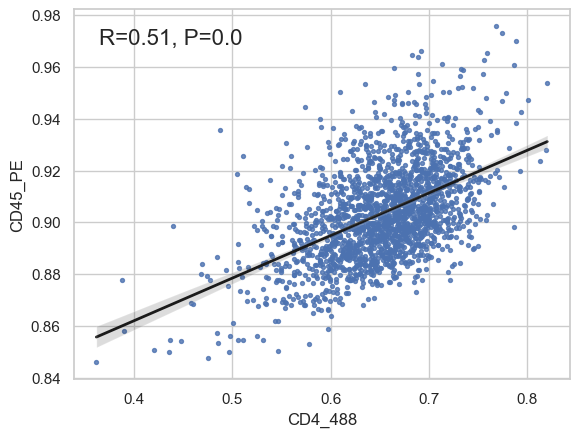

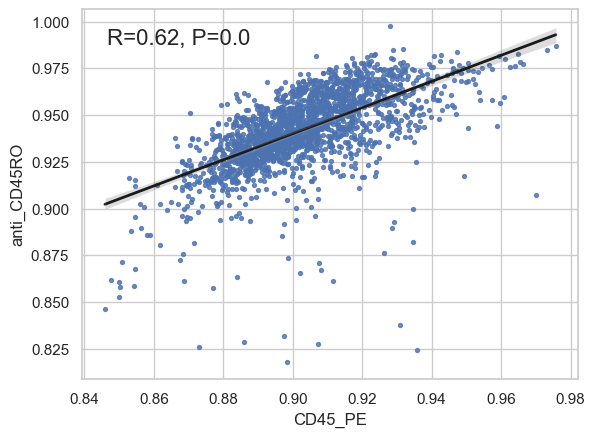

In [5]:
# compute Pearsonr scores and plot
sns.set(font_scale=1)
sns.set_style('whitegrid')
stats = pd.DataFrame(columns=['combo', 'pearsonr', 'pval'])
for e, i in enumerate(combinations(channels2, r=2)):
    
    if i == ('anti_CD45RO', 'CD45_PE'):
        i = ('CD45_PE', 'anti_CD45RO')
        
    
    ch1 = i[0]
    ch2 = i[1]

    stats.loc[e, 'combo'] = i

    x = cluster[ch1][cluster.index.isin(examples)]
    y = cluster[ch2][cluster.index.isin(examples)]
    res, pval = pearsonr(x=x, y=y, alternative='two-sided')

    stats.loc[e, 'pearsonr'] = res
    stats.loc[e, 'pval'] = pval

    regplot = pd.DataFrame(index=x.index, columns=[ch1, ch2])
    regplot.loc[:, ch1] = x.values
    regplot.loc[:, ch2] = y.values

    regplot[ch1] = regplot[ch1].astype('float')
    regplot[ch2] = regplot[ch2].astype('float')
    
    fig, ax = plt.subplots()
    
    sns.regplot(
        x=ch1,  y=ch2, data=regplot, scatter=True, ax=ax,
        scatter_kws={'s': 8},
        line_kws={'color': 'k', 'alpha': 1.0, 'lw': 2.0, 'zorder': 1}
        )

    # annotate regplot ticks
    # for row in regplot.iterrows():
    #     idx = row[0]
    #     val = row[1]
    #     label = example_dict[idx]
    #     plt.annotate(
    #         f'{label}', (row[1][0], row[1][1]), textcoords='offset points',
    #         xytext=(4.5, 4.5), ha='center', fontsize=12
    #         )

    # add Pearson R and P-value to plot
    ax.text(
        0.05, 0.95, f'R={round(res, 2)}, P={round(pval, 5)}',
        transform=ax.transAxes, fontsize=16, va='top', ha='left'
        )

    plt.savefig(os.path.join(out_dir, f'{ch1}_{ch2}.pdf'))
    plt.show()
    plt.close('all')